# House prices 

## Step 1: preparing data 

### 1.1 Removing N/A

In [1]:
import numpy as np
import pandas as pd 


In [2]:
train_og = pd.read_csv('data/train.csv')
test_og = pd.read_csv('data/test.csv')
x_train_raw = train_og.iloc[:,:-1]
y_train = train_og.iloc[:,-1]

Functions for joining and dividing back the data:

In [3]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data]).reset_index(drop=True)

def divide_df(all_data):
    return all_data.iloc[:1460], all_data.iloc[1460:]

In [82]:
all_data = concat_df(x_train_raw,test_og)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Обработка датасета. Часть Романа

In [83]:
# ставим заглушки на пропуски в категориях.
# пропуски у домов, у которых нет подвала. ставим заклушку 'No_basement'
all_data.iloc[:, 30:33] = all_data.iloc[:, 30:33].fillna('No_basement')
all_data.BsmtFinType1 = all_data.BsmtFinType1.fillna('No_basement')
all_data.BsmtFinType2 = all_data.BsmtFinType2.fillna('No_basement')
all_data.Electrical = all_data.Electrical.fillna('SBrkr')
all_data.KitchenQual = all_data.KitchenQual.fillna('Gd')

# заполняем наны по ситуации
all_data.BsmtFinSF1 = all_data.BsmtFinSF1.fillna(0)
all_data.iloc[:, 36:39] = all_data.iloc[:, 36:39].fillna(0)
all_data.iloc[:, 47:49] = all_data.iloc[:, 47:49].fillna(0)

In [84]:
taken_col = set(['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
        'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle',
        'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street',
        'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 'YearBuilt',
        'YearRemodAdd', 'YrSold'])
all_col = set(all_data.columns)
my_col = list(all_col - taken_col)

In [85]:
all_data[my_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GarageYrBlt    2760 non-null   float64
 1   Exterior2nd    2918 non-null   object 
 2   GarageArea     2918 non-null   float64
 3   Condition2     2919 non-null   object 
 4   MSZoning       2915 non-null   object 
 5   Fence          571 non-null    object 
 6   GarageCond     2760 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Exterior1st    2918 non-null   object 
 10  LotShape       2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Id             2919 non-null   int64  
 13  LotArea        2919 non-null   int64  
 14  Fireplaces     2919 non-null   int64  
 15  Functional     2917 non-null   object 
 16  GarageCars     2918 non-null   float64
 17  Condition1     2919 non-null   object 
 18  3SsnPorc

In [86]:
all_data[my_col].isnull().sum()

GarageYrBlt       159
Exterior2nd         1
GarageArea          1
Condition2          0
MSZoning            4
Fence            2348
GarageCond        159
LotConfig           0
LandContour         0
Exterior1st         1
LotShape            0
LandSlope           0
Id                  0
LotArea             0
Fireplaces          0
Functional          2
GarageCars          1
Condition1          0
3SsnPorch           0
MasVnrArea         23
MSSubClass          0
GarageQual        159
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
BldgType            0
EnclosedPorch       0
GarageType        157
Alley            2721
HouseStyle          0
dtype: int64

**Exterior1st**

primary material 

In [87]:
all_data['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [88]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

**Exterior2nd**

secondary cover material

In [89]:
all_data['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [90]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('Other')

**FireplaceQu**

NA if no fireplace

In [14]:
all_data['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [15]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('No')

**MasVnrArea**

only if MasVnrType is not nan 

In [16]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna(0)

In [17]:
all_data['MasVnrArea'].value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [18]:
def masvnr_filler(masvnr): 
    if masvnr == 0: 
        return 0
    else: 
        return all_data['MasVnrArea'].mean()
    
all_data['MasVnrArea'][all_data['MasVnrArea'].isna()] = all_data['MasVnrType'][all_data['MasVnrArea'].isna()].apply(masvnr_filler)

/tmp/ipykernel_14024/3272868284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['MasVnrArea'][all_data['MasVnrArea'].isna()] = all_data['MasVnrType'][all_data['MasVnrArea'].isna()].apply(masvnr_filler)


In [19]:
all_data['MasVnrArea'].value_counts()

MasVnrArea
0.0      1761
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

**Garage**

GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

NA if no garage

In [20]:
all_data['GarageArea'].describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [21]:
all_data['GarageType']  = all_data['GarageType'].fillna('No')
all_data['GarageYrBlt']  = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mean()) # есть явные выбросы!!! 
all_data['GarageYrBlt']  = all_data['GarageYrBlt'].fillna('No')
def garage_filler(gar): 
    if gar == 'No': 
        return 0
    else: 
        return all_data['GarageCars'].mode()
all_data['GarageCars'][all_data['GarageCars'].isna()] = all_data['GarageType'][all_data['GarageCars'].isna()].apply(garage_filler)
def garage_filler2(gar): 
    if gar == 'No': 
        return 0
    else: 
        return all_data['GarageArea'].mean()
all_data['GarageArea'][all_data['GarageArea'].isna()] = all_data['GarageType'][all_data['GarageArea'].isna()].apply(garage_filler2)
all_data['GarageQual']  = all_data['GarageQual'].fillna('No')
all_data['GarageCond']  = all_data['GarageCond'].fillna('No')
all_data['GarageFinish']  = all_data['GarageFinish'].fillna('No')

/tmp/ipykernel_14024/3938196724.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['GarageCars'][all_data['GarageCars'].isna()] = all_data['GarageType'][all_data['GarageCars'].isna()].apply(garage_filler)
/tmp/ipykernel_14024/3938196724.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['GarageArea'][all_data['GarageArea'].isna()] = all_data['GarageType'][all_data['GarageArea'].isna()].apply(garage_filler2)


**LotFrontage**

Linear feet of street connected to property

In [22]:
all_data['LotFrontage'].mean()

69.30579531442663

In [23]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

**Fence**

na if no fence

In [24]:
all_data['Fence']  = all_data['Fence'].fillna('No')

**Alley**

na if no alley access

In [25]:
all_data['Alley']  = all_data['Alley'].fillna('No')

**MSZoning**


In [26]:
all_data['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

**Functional**

"assume typical"

In [28]:
all_data['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [29]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

------------------------------

checking results of my part: 

In [30]:
all_data[my_col].isnull().sum()

Exterior2nd      0
LotShape         0
GarageCars       0
LotArea          0
Exterior1st      0
EnclosedPorch    0
Condition1       0
GarageFinish     0
Alley            0
GarageQual       0
Id               0
GarageCond       0
Functional       0
LotConfig        0
MSSubClass       0
GarageType       0
MSZoning         0
FireplaceQu      0
BldgType         0
HouseStyle       0
GarageYrBlt      0
Fence            0
Condition2       0
LandContour      0
LotFrontage      0
3SsnPorch        0
MasVnrArea       0
LandSlope        0
Fireplaces       0
GarageArea       0
dtype: int64

In [31]:
all_data[my_col].to_csv('data/df_alex.csv')

### 1.2 joining parts 

In [4]:
alex_df = pd.read_csv('data/df_alex.csv')
sveta_df = pd.read_csv('data/df_Sveta.csv')
roman_df = pd.read_csv('data/all_data_roman.csv')

In [5]:
joined_all = pd.concat([alex_df,sveta_df,roman_df],axis=1)

In [6]:
joined_all.isnull().sum().sort_values(ascending=False)

MiscFeature     2814
MasVnrType      1766
SalePrice       1459
BsmtExposure      82
BsmtCond          82
                ... 
Alley              0
LotArea            0
Id                 0
GarageCars         0
KitchenQual        0
Length: 77, dtype: int64

While joining data, some values somehow changed back to NA. We checked and all of them were filled by "No", since the description stated that NA means the feature is not present. Thus, we remove the NA in a similar manner

In [7]:
joined_all.drop(['SalePrice','Unnamed: 0'],inplace=True, axis=1)

In [8]:
joined_all.drop('Id',inplace=True, axis=1)

In [9]:
joined_all = joined_all.fillna('no')
joined_all = joined_all.loc[:,~joined_all.columns.duplicated()].copy()


In [10]:
joined_train, joined_test = divide_df(joined_all)

In [11]:
joined_train.shape

(1460, 72)

---------------

### 1.3 Removing outliers (cancelled - worsens result)

In [52]:
# mask_numeric = (joined_train.dtypes != object)
# joined_train.loc[:,mask_numeric]

,Fireplaces,MasVnrArea,EnclosedPorch,LotFrontage,GarageYrBlt,3SsnPorch,GarageCars,LotArea,MSSubClass,GarageArea,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr
0,0,196.0,0,65.0,2003.0,0,2.0,8450,60,548.0,...,856,854,0,1710,1,0,2,1,3,1
1,1,0.0,0,80.0,1976.0,0,2.0,9600,20,460.0,...,1262,0,0,1262,0,1,2,0,3,1
2,1,162.0,0,68.0,2001.0,0,2.0,11250,60,608.0,...,920,866,0,1786,1,0,2,1,3,1
3,1,0.0,272,60.0,1998.0,0,3.0,9550,70,642.0,...,961,756,0,1717,1,0,1,0,3,1
4,1,350.0,0,84.0,2000.0,0,3.0,14260,60,836.0,...,1145,1053,0,2198,1,0,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0.0,0,62.0,1999.0,0,2.0,7917,60,460.0,...,953,694,0,1647,0,0,2,1,3,1
1456,2,119.0,0,85.0,1978.0,0,2.0,13175,20,500.0,...,2073,0,0,2073,1,0,2,0,3,1
1457,2,0.0,0,66.0,1941.0,0,1.0,9042,70,252.0,...,1188,1152,0,2340,0,0,2,0,4,1
1458,0,0.0,112,68.0,1950.0,0,1.0,9717,20,240.0,...,1078,0,0,1078,1,0,1,0,2,1


In [53]:
# upper = (joined_train.loc[:,mask_numeric] >= joined_train.loc[:,mask_numeric].quantile(0.01))
# lower = (joined_train.loc[:,mask_numeric] <= joined_train.loc[:,mask_numeric].quantile(0.99))
# joined_train.loc[:,mask_numeric][upper & lower]

,Fireplaces,MasVnrArea,EnclosedPorch,LotFrontage,GarageYrBlt,3SsnPorch,GarageCars,LotArea,MSSubClass,GarageArea,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr
0,0.0,196.0,0.0,65.0,2003.0,0.0,2.0,8450.0,60,548.0,...,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0
1,1.0,0.0,0.0,80.0,1976.0,0.0,2.0,9600.0,20,460.0,...,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0
2,1.0,162.0,0.0,68.0,2001.0,0.0,2.0,11250.0,60,608.0,...,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0
3,1.0,0.0,NaN,60.0,1998.0,0.0,3.0,9550.0,70,642.0,...,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0
4,1.0,350.0,0.0,84.0,2000.0,0.0,3.0,14260.0,60,836.0,...,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.0,62.0,1999.0,0.0,2.0,7917.0,60,460.0,...,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0
1456,2.0,119.0,0.0,85.0,1978.0,0.0,2.0,13175.0,20,500.0,...,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0
1457,2.0,0.0,0.0,66.0,1941.0,0.0,1.0,9042.0,70,252.0,...,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0
1458,0.0,0.0,112.0,68.0,1950.0,0.0,1.0,9717.0,20,240.0,...,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0


In [57]:
# idxs_to_remove = []
# for col in joined_train.loc[:,mask_numeric]:
#     mask = (joined_train[col] > joined_train[col].quantile(0.99)) | (joined_train[col] < joined_train[col].quantile(0.01))
#     idx_to_remove = joined_train[col][mask].index
#     idxs_to_remove.extend(idx_to_remove)
# idxs_to_remove = set(idxs_to_remove)
# idxs_to_remove

{3,
 5,
 29,
 48,
 53,
 55,
 58,
 64,
 70,
 74,
 75,
 88,
 93,
 106,
 113,
 115,
 118,
 129,
 137,
 144,
 153,
 166,
 169,
 170,
 171,
 178,
 182,
 185,
 187,
 188,
 189,
 197,
 198,
 205,
 224,
 227,
 231,
 232,
 235,
 237,
 246,
 249,
 250,
 251,
 258,
 263,
 267,
 270,
 271,
 277,
 278,
 280,
 291,
 297,
 298,
 304,
 309,
 313,
 317,
 322,
 326,
 328,
 330,
 332,
 335,
 346,
 349,
 350,
 357,
 358,
 362,
 363,
 375,
 378,
 384,
 392,
 398,
 402,
 406,
 420,
 430,
 434,
 439,
 440,
 451,
 454,
 456,
 457,
 470,
 477,
 480,
 482,
 489,
 496,
 510,
 517,
 523,
 528,
 529,
 533,
 539,
 542,
 570,
 581,
 583,
 597,
 605,
 608,
 614,
 624,
 628,
 630,
 634,
 635,
 636,
 642,
 649,
 653,
 654,
 661,
 664,
 676,
 678,
 691,
 696,
 705,
 706,
 716,
 726,
 735,
 738,
 740,
 745,
 747,
 755,
 764,
 767,
 768,
 769,
 774,
 786,
 798,
 799,
 803,
 807,
 808,
 809,
 813,
 819,
 825,
 837,
 843,
 848,
 854,
 875,
 883,
 888,
 890,
 893,
 897,
 898,
 909,
 910,
 916,
 921,
 923,
 924,
 932,
 934,
 

In [58]:
# cleaned_train = joined_train.drop(idxs_to_remove,axis=0)
# cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 0 to 1456
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fireplaces     1209 non-null   int64  
 1   Exterior2nd    1209 non-null   object 
 2   FireplaceQu    1209 non-null   object 
 3   BldgType       1209 non-null   object 
 4   MasVnrArea     1209 non-null   float64
 5   GarageQual     1209 non-null   object 
 6   EnclosedPorch  1209 non-null   int64  
 7   LotFrontage    1209 non-null   float64
 8   GarageFinish   1209 non-null   object 
 9   LotShape       1209 non-null   object 
 10  Condition1     1209 non-null   object 
 11  GarageYrBlt    1209 non-null   float64
 12  LandContour    1209 non-null   object 
 13  GarageCond     1209 non-null   object 
 14  Fence          1209 non-null   object 
 15  3SsnPorch      1209 non-null   int64  
 16  Exterior1st    1209 non-null   object 
 17  LotConfig      1209 non-null   object 
 18  Condition2   

_1.3.1. Data pred-processing_
Визуализация процесса, как наша команда отсеивала фичи, которые пойдут/не пойдут в модель и как мы классифицировали выбросы.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


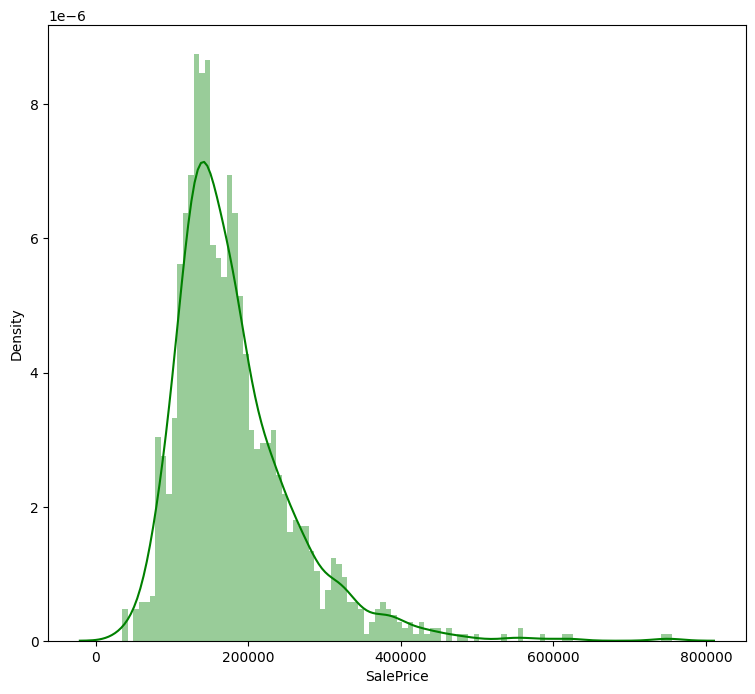

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_all = pd.read_csv('/home/svetlana/Bootcamp/ds-phase-1/06-supervised/df_all_Sveta.csv')
# Сторим график распределения стоимости
print(df_all['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_all['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

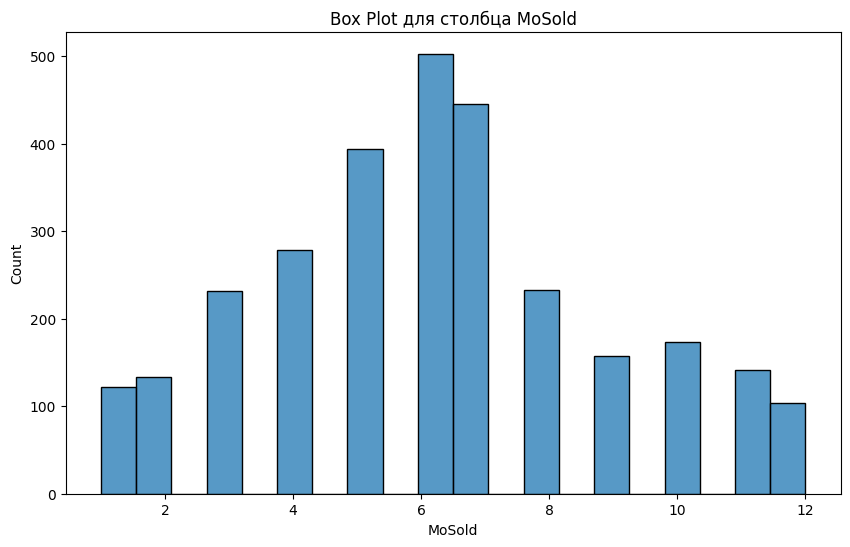

In [8]:

# Month Sold (MM)
df_all['MoSold'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(x=df_all['MoSold'])
plt.xlabel('MoSold')
plt.title('Box Plot для столбца MoSold')
plt.show()

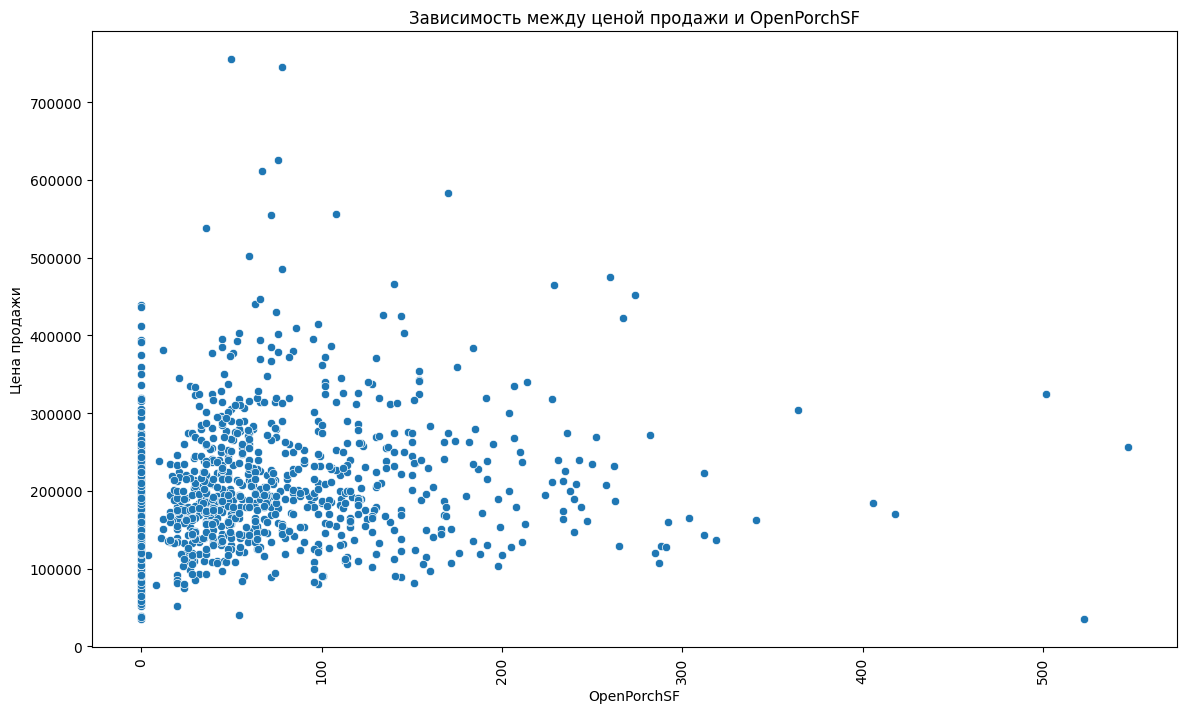

In [9]:
# # OpenPorchSF
# OpenPorchSF: Open porch area in square feet нет зависимости, исключаем из модели

df_all['OpenPorchSF'].value_counts()
# Создание графика с зависимостью между 'SalePrice' и 'OpenPorchSF'
plt.figure(figsize=(14, 8))
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df_all)
plt.xticks(rotation=90)
plt.xlabel('OpenPorchSF')
plt.ylabel('Цена продажи')
plt.title('Зависимость между ценой продажи и OpenPorchSF')

plt.show()

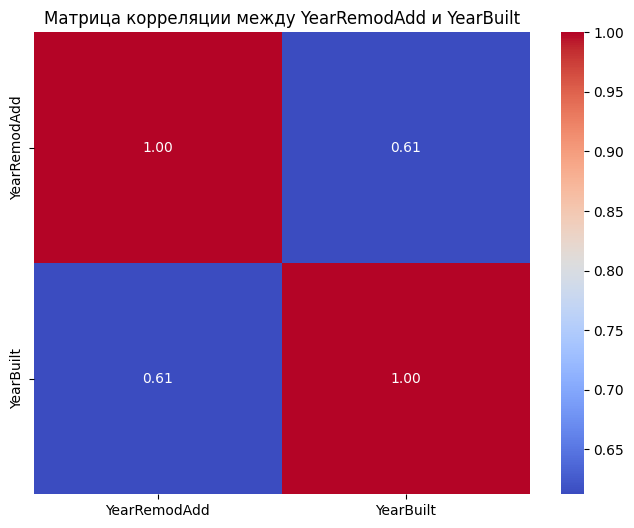

In [18]:
# YearRemodAdd emodel date (same as construction date if no remodeling or additions)
# сильная корреляция с YearBuilt, исключить из модели
# df_all['MasVnrType'] = df_all['MasVnrType'].fillna('None')
df_all['YearRemodAdd'].value_counts()
correlation_matrix = df_all[['YearRemodAdd', 'YearBuilt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции между YearRemodAdd и YearBuilt')
plt.show()

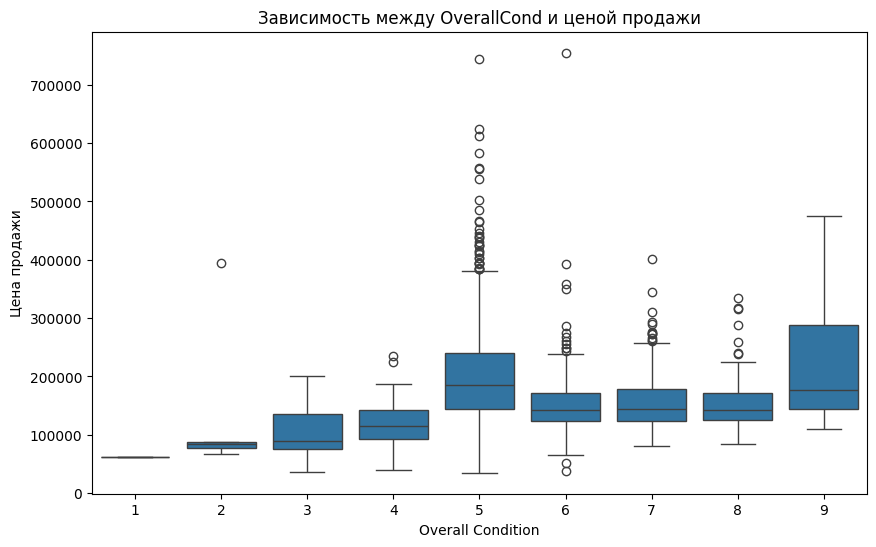

In [10]:
# OverallCond Rates the overall condition of the house
# Создание box plot для 'OverallCond' и 'SalePrice'. Есть выбросы по этой фиче.
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df_all)
plt.xlabel('Overall Condition')
plt.ylabel('Цена продажи')
plt.title('Зависимость между OverallCond и ценой продажи')

plt.show()

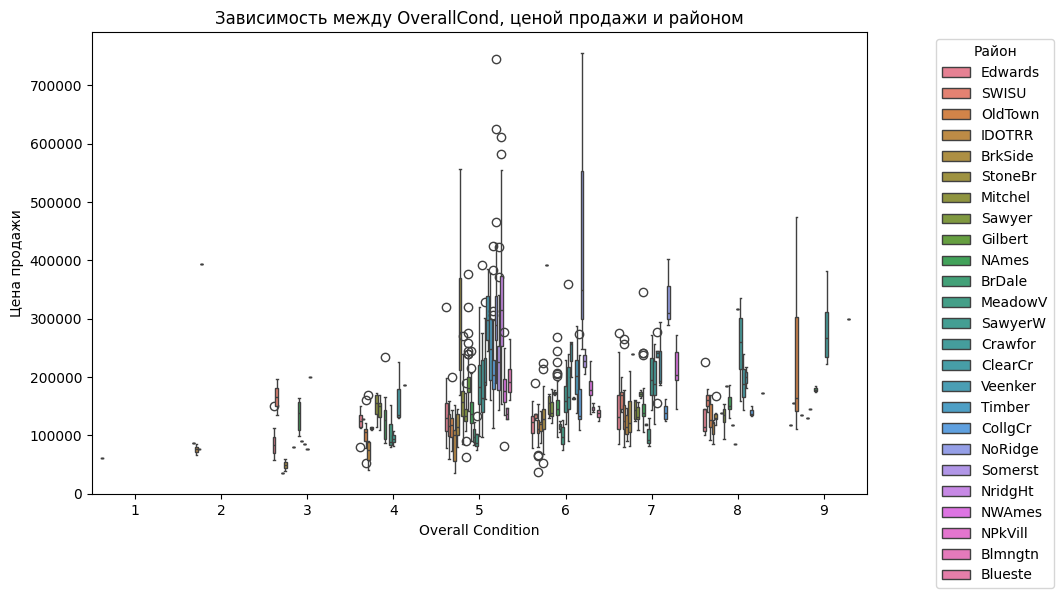

In [11]:
# Создание box plot для 'OverallCond' и 'SalePrice' с разделением по районам
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df_all, hue='Neighborhood')
plt.xlabel('Overall Condition')
plt.ylabel('Цена продажи')
plt.title('Зависимость между OverallCond, ценой продажи и районом')

plt.legend(title='Район', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

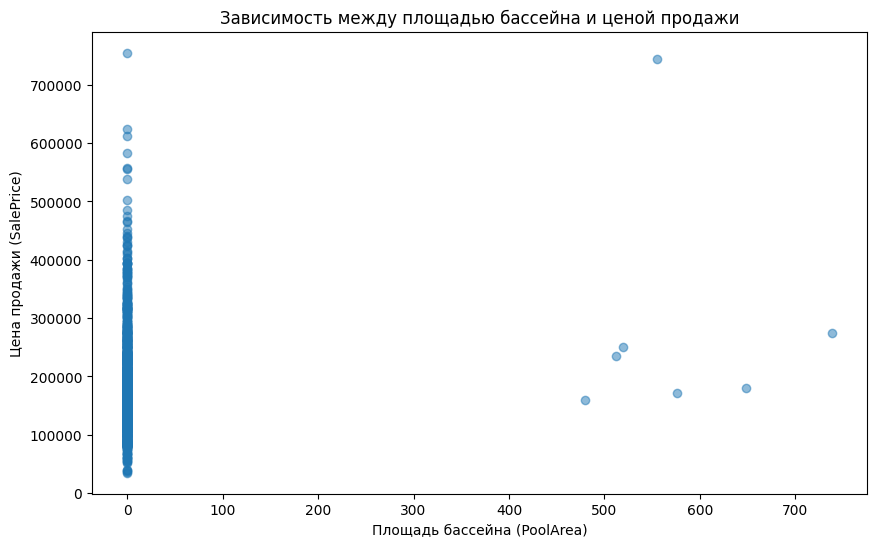

In [12]:
# PoolArea: Pool area in square feet. Зпависимости нет, удалить этот признак из модели.
# 
df_all['PoolArea'].isnull().sum()
plt.figure(figsize=(10, 6))
plt.scatter(df_all['PoolArea'], df_all['SalePrice'], alpha=0.5)
plt.xlabel('Площадь бассейна (PoolArea)')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Зависимость между площадью бассейна и ценой продажи')

plt.show()

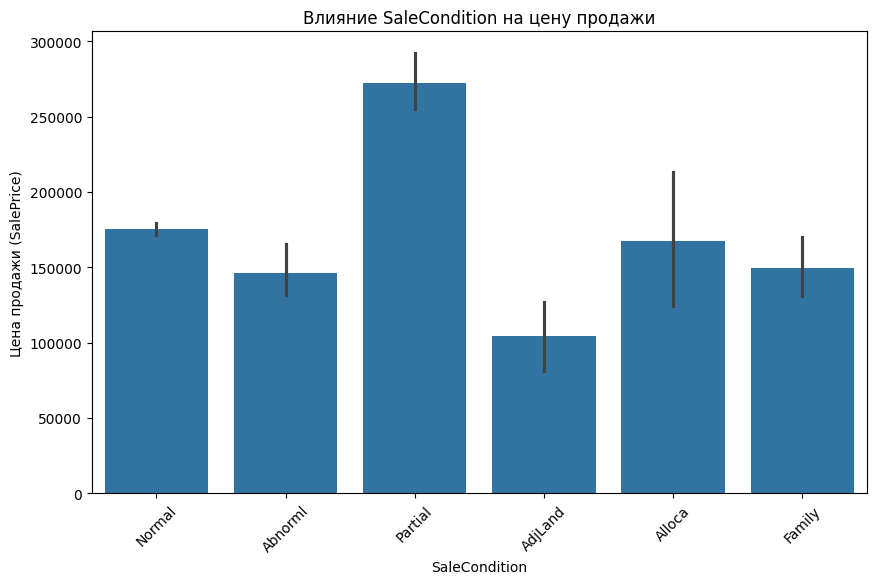

In [13]:
# SaleCondition:

df_all['SaleCondition'].value_counts()
# df_all['SaleCondition'].isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x='SaleCondition', y='SalePrice', data=df_all)
plt.xlabel('SaleCondition')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Влияние SaleCondition на цену продажи')

plt.xticks(rotation=45)

plt.show()

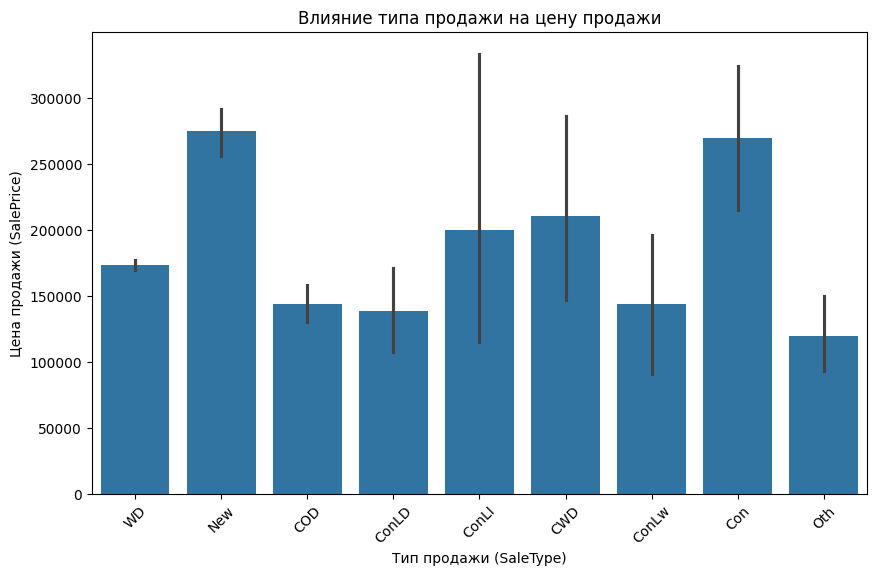

In [14]:
# SaleType заполняем пропуски медианой
# df_all['SaleType'].value_counts()
df_all['SaleType'].isnull().sum()

# Создание полосчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='SaleType', y='SalePrice', data=df_all)
plt.xlabel('Тип продажи (SaleType)')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Влияние типа продажи на цену продажи')

plt.xticks(rotation=45)  # Повернуть названия типов продажи для лучшей читаемости

plt.show()

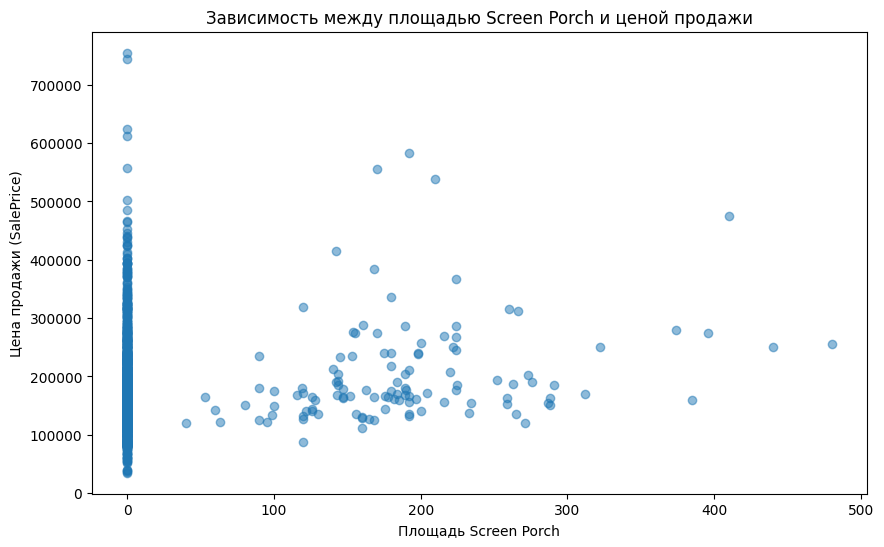

In [15]:
# ScreenPorch: Screen porch area in square feet. нет зависимости, исключить из модели.
df_all['ScreenPorch'].value_counts()
# df_all['ScreenPorch'].isnull().sum()
# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df_all['ScreenPorch'], df_all['SalePrice'], alpha=0.5)
plt.xlabel('Площадь Screen Porch')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Зависимость между площадью Screen Porch и ценой продажи')

plt.show()

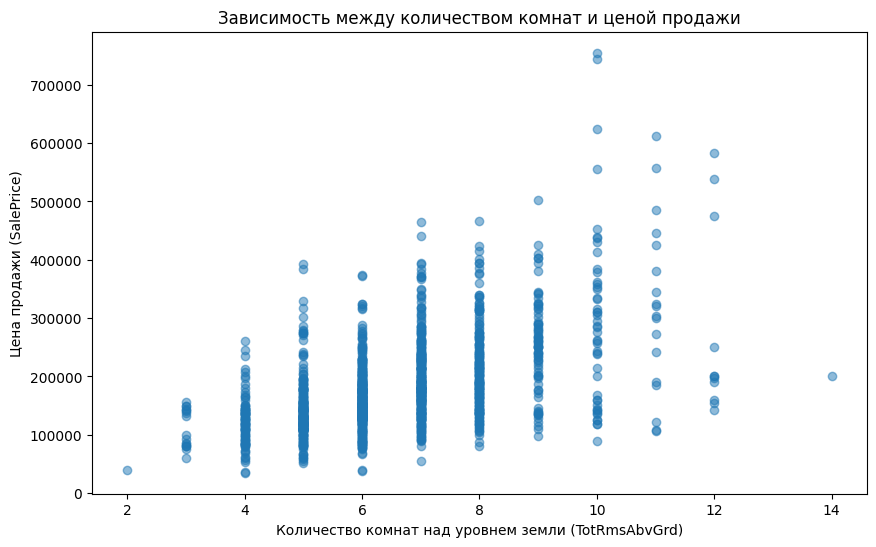

In [16]:
# TotRmsAbvGrd Total rooms above grade (does not include bathrooms)
df_all['TotRmsAbvGrd'].value_counts()
# df_all['TotRmsAbvGrd'].isnull().sum()
# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df_all['TotRmsAbvGrd'], df_all['SalePrice'], alpha=0.5)
plt.xlabel('Количество комнат над уровнем земли (TotRmsAbvGrd)')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Зависимость между количеством комнат и ценой продажи')

plt.show()

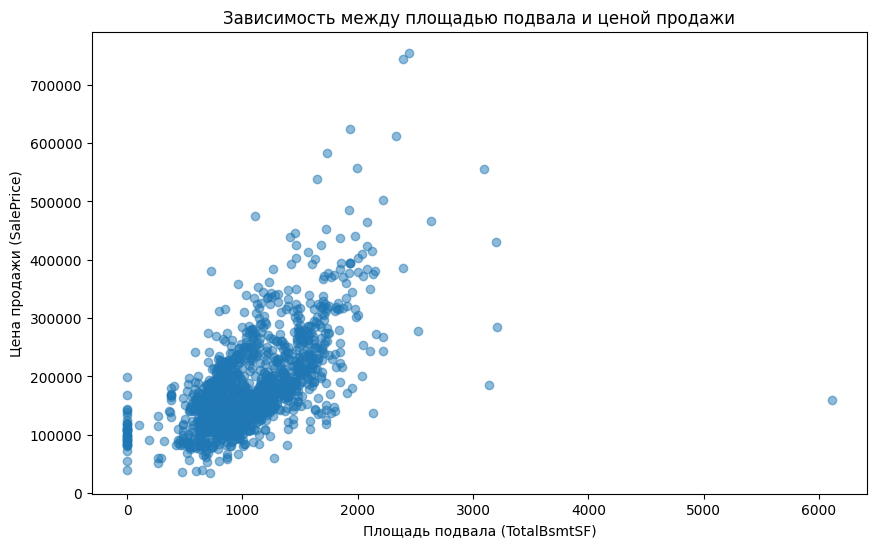

In [17]:
# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df_all['TotalBsmtSF'], df_all['SalePrice'], alpha=0.5)
plt.xlabel('Площадь подвала (TotalBsmtSF)')
plt.ylabel('Цена продажи (SalePrice)')
plt.title('Зависимость между площадью подвала и ценой продажи')

plt.show()

### 1.4 Encoding and normalizing

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, LabelEncoder

In [13]:
y_log = np.log(y_train)

In [14]:
cat_mask = (joined_all.nunique() < 10) | (joined_all.dtypes == object)
cat_mask2 = joined_train.loc[:,cat_mask].columns
joined_train.loc[:,cat_mask]

,Fireplaces,Exterior2nd,FireplaceQu,BldgType,GarageQual,GarageFinish,LotShape,Condition1,LandContour,GarageCond,...,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual
0,0,VinylSd,No,1Fam,TA,RFn,Reg,Norm,Lvl,TA,...,Ex,Y,SBrkr,1,0,2,1,3,1,Gd
1,1,MetalSd,TA,1Fam,TA,RFn,Reg,Feedr,Lvl,TA,...,Ex,Y,SBrkr,0,1,2,0,3,1,TA
2,1,VinylSd,TA,1Fam,TA,RFn,IR1,Norm,Lvl,TA,...,Ex,Y,SBrkr,1,0,2,1,3,1,Gd
3,1,Wd Shng,Gd,1Fam,TA,Unf,IR1,Norm,Lvl,TA,...,Gd,Y,SBrkr,1,0,1,0,3,1,Gd
4,1,VinylSd,TA,1Fam,TA,RFn,IR1,Norm,Lvl,TA,...,Ex,Y,SBrkr,1,0,2,1,4,1,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,VinylSd,TA,1Fam,TA,RFn,Reg,Norm,Lvl,TA,...,Ex,Y,SBrkr,0,0,2,1,3,1,TA
1456,2,Plywood,TA,1Fam,TA,Unf,Reg,Norm,Lvl,TA,...,TA,Y,SBrkr,1,0,2,0,3,1,TA
1457,2,CmentBd,Gd,1Fam,TA,RFn,Reg,Norm,Lvl,TA,...,Ex,Y,SBrkr,0,0,2,0,4,1,Gd
1458,0,MetalSd,No,1Fam,TA,Unf,Reg,Norm,Lvl,TA,...,Gd,Y,FuseA,1,0,1,0,2,1,Gd


In [15]:
te = TargetEncoder()

te.fit(joined_train.loc[:,cat_mask],y_log)

joined_train.loc[:,cat_mask] = te.transform(joined_train.loc[:,cat_mask])

joined_train.loc[:,cat_mask]

,Fireplaces,Exterior2nd,FireplaceQu,BldgType,GarageQual,GarageFinish,LotShape,Condition1,LandContour,GarageCond,...,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual
0,11.809111,12.20932,11.809111,12.047492,12.06851,12.172485,11.936182,12.042901,12.022695,12.070453,...,12.207416,12.061066,12.061414,12.136113,12.024487,12.215452,12.197820,12.049859,12.037433,12.222157
1,12.200457,11.86277,12.186123,12.047492,12.06851,12.172485,11.936182,11.820022,12.022695,12.070453,...,12.207416,12.061066,12.061414,11.943895,12.018031,12.215452,11.922768,12.049859,12.037433,11.810738
2,12.200457,12.20932,12.186123,12.047492,12.06851,12.172485,12.16321,12.042901,12.022695,12.070453,...,12.207416,12.061066,12.061414,12.136113,12.024487,12.215452,12.197820,12.049859,12.037433,12.222157
3,12.200457,11.895881,12.255985,12.047492,12.06851,11.819163,12.16321,12.042901,12.022695,12.070453,...,11.910683,12.061066,12.061414,12.136113,12.024487,11.768622,11.922768,12.049859,12.037433,12.222157
4,12.200457,12.20932,12.186123,12.047492,12.06851,12.172485,12.16321,12.042901,12.022695,12.070453,...,12.207416,12.061066,12.061414,12.136113,12.024487,12.215452,12.197820,12.203748,12.037433,12.222157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.200457,12.20932,12.186123,12.047492,12.06851,12.172485,11.936182,12.042901,12.022695,12.070453,...,12.207416,12.061066,12.061414,11.943895,12.024487,12.215452,12.197820,12.049859,12.037433,11.810738
1456,12.298626,11.994841,12.186123,12.047492,12.06851,11.819163,11.936182,12.042901,12.022695,12.070453,...,11.816371,12.061066,12.061414,12.136113,12.024487,12.215452,11.922768,12.049859,12.037433,11.810738
1457,12.298626,12.196252,12.255985,12.047492,12.06851,12.172485,11.936182,12.042901,12.022695,12.070453,...,12.207416,12.061066,12.061414,11.943895,12.024487,12.215452,11.922768,12.203748,12.037433,12.222157
1458,11.809111,11.86277,11.809111,12.047492,12.06851,11.819163,11.936182,12.042901,12.022695,12.070453,...,11.910683,12.061066,11.663158,12.136113,12.024487,11.768622,11.922768,11.876168,12.037433,12.222157


In [16]:
ss = StandardScaler()

ss.fit(joined_train)
joined_train = ss.transform(joined_train)

pd.DataFrame(joined_train).shape

(1460, 72)

In [17]:

joined_test[cat_mask2] = te.transform(joined_test[cat_mask2])
joined_test = ss.fit_transform(joined_test)

/tmp/ipykernel_6025/3965285185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_test[cat_mask2] = te.transform(joined_test[cat_mask2])


### 1.5 PCA (cancelled - worsens result)

In [20]:
from sklearn.decomposition import TruncatedSVD, PCA

pca = PCA(n_components=50)
pca.fit(joined_train)

PCA(n_components=50)

In [21]:
round(pca.explained_variance_ratio_.sum() *100,2)

94.5

In [22]:
joined_train_pca = pca.transform(joined_train)
joined_test_pca = pca.transform(joined_test)

### 

In [153]:
joined_train.to_csv('data/latest_train.csv')
joined_test.to_csv('data/latest_test.csv')

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

y_log = np.log(y_train)

lr = LinearRegression()

boost = GradientBoostingRegressor()
params = {
    'learning_rate': [0.01,0.05,0.1,0.2,0.4,0.8],
    'n_estimators': [15,20,30,40,50,80,100],
    'max_depth': [2,3,4,5]
}


cv = GridSearchCV(boost, 
                  param_grid=params, 
                  scoring='neg_root_mean_squared_error', 
                  cv=KFold(n_splits=5, random_state=1, shuffle=True), 
                  n_jobs=-1
                 )

cv.fit(joined_train, y_log)
cv.best_score_

-0.1261457000917979

0.12610866183763322 - before pca
0.14021492068637306 - after pca 

In [32]:
res_example = pd.read_csv('data/sample_submission.csv')
res_kaggle = res_example.copy()


In [26]:
cv.best_estimator_.predict(joined_test)


array([11.78180476, 12.00535013, 12.08608291, ..., 11.99553171,
       11.6724711 , 12.24061948])

In [33]:
res_kaggle['SalePrice'] = np.exp(cv.best_estimator_.predict(joined_test))
res_kaggle.drop('Id', inplace=True, axis=1)
res_kaggle.index = res_example['Id']


In [34]:
res_kaggle

,SalePrice
Id,
1461,130849.718592
1462,163627.884479
1463,177385.908367
1464,190574.241404
1465,184687.526457
...,...
2915,83184.329904
2916,83815.277940
2917,162029.178450


In [35]:
res_kaggle.to_csv('data/egor_team_third_try.csv')
